In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_57957_I')

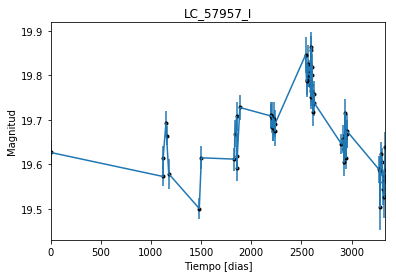

In [2]:
data = np.genfromtxt('LC_57957_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_57957_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

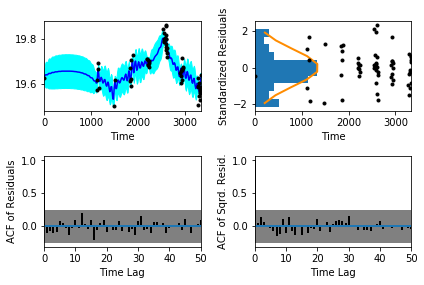

In [5]:
sample.assess_fit()

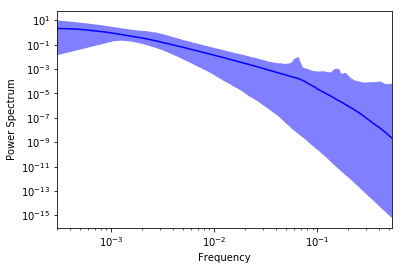

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_57957_I')

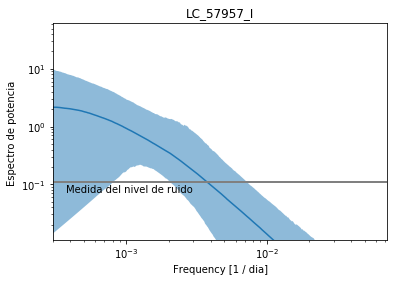

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_57957_I')

Text(0.5,1,'Prediccion , valor esperado LC_57957_I')

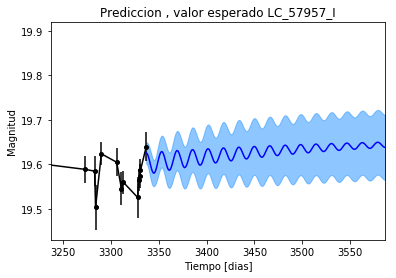

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_57957_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_57957_I')

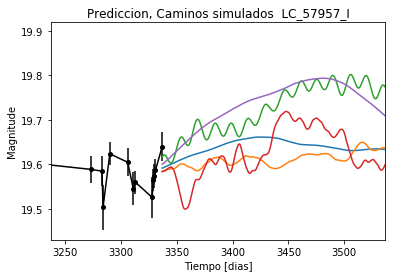

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_57957_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_57957_I')

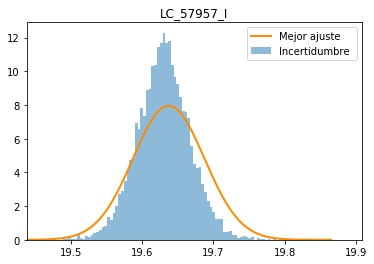

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_57957_I')

Text(0.5,1,'Interpolacion, camino simulado LC_57957_I')

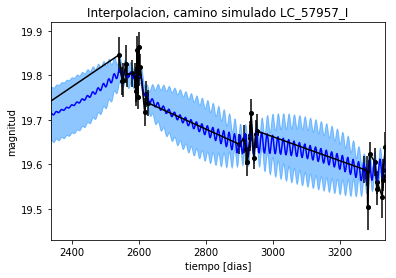

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_57957_I')

Text(0.5,1,'Interpolacion, camino simulado LC_57957_I')

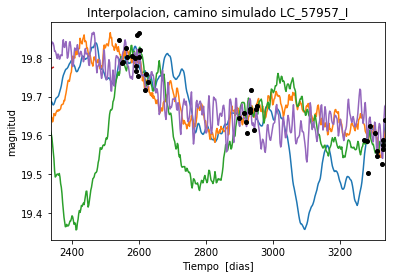

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_57957_I')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 592.470475324
Median: 0.0187568232585
Standard deviation: 0.202270808197
68% credibility interval: [ 0.00129834  0.20924653]
95% credibility interval: [  3.79554138e-04   7.76271221e-01]
99% credibility interval: [  3.19424323e-04   1.01150656e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 446.061368538
Median: 0.00582217858606
Standard deviation: 0.104262021746
68% credibility interval: [ 0.00064891  0.06805002]
95% credibility interval: [  3.39647798e-04   3.78417317e-01]
99% credibility interval: [  3.12604951e-04   6.75595080e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 267.214014741
Median: 0.0742983309069


In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 345.348762595
Median: 127.089446451
Standard deviation: 1.92286312382
68% credibility interval: [ 125.1322143   128.63442342]
95% credibility interval: [ 122.6344641   130.49561779]
99% credibility interval: [ 120.68412609  131.45909764]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 542.308162954
Median: 1.25657357363
Standard deviation: 2.5213468388
68% credibility interval: [ 0.182668    4.68686691]
95% credibility interval: [ 0.03892388  9.10735007]
99% credibility interval: [  0.01877288  12.00819616]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 696.51871678
Median: 1.47863373118
Standard deviation: 11.7761301508
68% credibility interval: [  0.11476872  14.89928883]
95% credibility interval: [  6.91358047e-0

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 475.454488578
Median: 8.14623319898e-27
Standard deviation: 4.97043857517e+150
68% credibility interval: [  4.49032844e-76   6.77096837e+35]
95% credibility interval: [  2.58130385e-220   2.09452374e+123]
99% credibility interval: [  1.20489827e-225   1.41399950e+151]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1487.19700245
Median: 19.6472874559
Standard deviation: 0.0368582816453
68% credibility interval: [ 19.61451095  19.67802251]
95% credibility interval: [ 19.5670602   19.71500271]
99% credibility interval: [ 19.52036286  19.75271584]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 450.692847219
Median: 0.0693284633729
Standard deviation: 0.276206512468
68% credibility interval: [ 0.          0.50942542]
95% credibility interval: [ 0.          0.94958461]
99% credibility interval: [ 0.          1.03866649]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 450.692847219
Median: 0.0693284633729
Standard deviation: 0.276206512468
68% credibility interval: [ 0.          0.50942542]
95% credibility interval: [ 0.          0.94958461]
99% credibility interval: [ 0.          1.03866649]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 634.946675573
Median: 0.0
Standard deviation: 0.000540616672895
68% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 345.348762595
Median: 127.089446451
Standard deviation: 1.92286312382
68% credibility interval: [ 125.1322143   128.63442342]
95% credibility interval: [ 122.6344641   130.49561779]
99% credibility interval: [ 120.68412609  131.45909764]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1834.27207375
Median: 0.00672875535898
Standard deviation: 0.00510768590433
68% credibility interval: [ 0.00426191  0.01160046]
95% credibility interval: [ 0.00272915  0.02084382]
99% credibility interval: [ 0.00216189  0.03206331]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 627.553812095
Median: 1.12679912579
Standard deviation: 0.204065076422
68% credibility interval: [ 0.95680848  1.35232928]
95% credibility interval: [ 0.80310429  1.60476719]
99% credibility interval: [ 0.72535426  1.75461185]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 984.485438233
Median: 0.000756022367237
Standard deviation: 0.169525824375
68% credibility interval: [  9.65957264e-40   5.30652714e-02]
95% credibility interval: [  1.14374616e-126   4.89166285e-001]
99% credibility interval: [  4.60775220e-154   1.19046624e+000]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 592.470475324
Median: (-0.117852596307-4.96323645339j)
Standard deviation: 2.15104844292
68% credibility interval: [-1.31473472+0.j         -0.00815772-0.64235209j]
95% credibility interval: [ -4.87745593e+00+0.j          -2.38480898e-03-3.27269787j]
99% credibility interval: [ -6.35548315e+00-2.84016919j  -2.00700221e-03-0.4286549j ]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 446.061368538
Median: (-0.0365818269477+0.517055413638j)
Standard deviation: 1.85498324259
68% credibility interval: [-0.42757091+3.86655157j -0.00407719+0.40679638j]
95% credibility interval: [ -2.37766613e+00+4.1779938j  -2.13407006e-03+0.j       ]
99% credibility interval: [ -4.24488908e+00+2.71234236j  -1.96415483e-03+0.j        ]
Poster